In [1]:
!pip install git+https://github.com/toncenter/tvm_valuetypes.git

  Cloning https://github.com/toncenter/tvm_valuetypes.git to /private/var/folders/3k/91ytkdls3l93dl_snvs85g2r0000gn/T/pip-req-build-hq1u9lut
  Running command git clone --filter=blob:none --quiet https://github.com/toncenter/tvm_valuetypes.git /private/var/folders/3k/91ytkdls3l93dl_snvs85g2r0000gn/T/pip-req-build-hq1u9lut
  Resolved https://github.com/toncenter/tvm_valuetypes.git to commit fdc989ff1b0938ec8ae1c7fbb11ff8dee440c9c5
  Preparing metadata (setup.py) ... done

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [10]:
#%load_ext autoreload
#%autoreload 2
from tvm_python import PyTVM, method_name_to_id, code_disasseble, pack_address, load_address, parse_token_data
import codecs
from tvm_valuetypes import Cell, deserialize_boc
from dateutil.parser import parse 
import codecs

In [3]:
def fix_op(item):
    return item.split('\t')[1].replace('execute ', '').replace('\n', '')

# Just code

In [ ]:
PyTVM(code="te6ccgEBAQEAAwAAAnE=").run_vm()

### Stack is not reversed ;)

In [ ]:
SUB = "te6ccgEBAQEAAwAAAqE="
a = 3
b = 1

tvm = PyTVM(code=SUB)
tvm.set_stack([a, b])
tvm.run_vm()

#### Balance can be really big integer

In [ ]:
tvm = PyTVM(code=SUB)

tvm.set_c7(address="EQCI5yVsMccJDqrKH9knYAp0avK5fh-UBZ5Ns1xWOvIA2UKl", # some contracts may use MYADDR in code
           balanceGrams="9951186000", # or trying get own balance from c7
           randseed="1") # or maybe you use random in your contract :)

# Disassembler

In [ ]:
code_disasseble("te6ccgEBAQEAAwAAAnE=")

# Easy test examples

In [ ]:
# Simple PUSHINT 1
# You can define log_level if you want more stuff
tvm_result = PyTVM(code="te6ccgEBAQEAAwAAAnE=", log_level=4).run_vm()
assert tvm_result[0] == 1

print(f"Got 1 from TVM: {tvm_result[0]}")

In [ ]:
tvm_result

In [ ]:
# c3 is continuation, but we just serialize it to base64 BOC
# PUSHINT 1 PUSH c3
tvm_result = PyTVM(code="te6ccgEBAQEABQAABnHtQw==").run_vm()
tvm_result

In [ ]:
cell = Cell()
b64 = tvm_result[1]['value']
boc = codecs.decode(codecs.encode(b64, 'utf8'), 'base64')
deserialize_boc(boc)

In [ ]:
# c7 push (tuple)
tvm_result = PyTVM(code="te6ccgEBAQEABAAABO1H").run_vm()
tvm_result[0] # just default c7

## Change c7

In [ ]:
# c7 push (tuple)
tvm = PyTVM(code="te6ccgEBAQEABAAABO1H")

In [ ]:
tvm.set_c7(translt="100",
           unixtime=179, 
           globalConfig="te6ccgEBAQEABAAABO1H",
           randseed="100", 
           address="EQBq5JLG8-1juc-N95IFBnOM2NGrcJsMoFYFoWH-DaVJ2lVw",
           balanceGrams=str(100000000))

In [ ]:
tvm.run_vm()

## Get detailed result

In [ ]:
print("Exit code: ", tvm.exit_code,
"\nC5: ", tvm.actions, 
"\nGas credit: ",tvm.gas_credit, 
"\nGas used: ",tvm.gas_used, 
"\nC4: ",tvm.new_data, 
"\nVM Steps: ",tvm.vm_steps,
"\nVM final hash: ",tvm.vm_final_state_hash,
"\nVM init hash: ",tvm.vm_init_state_hash,
"\nVM success: ",tvm.success)

## Set stack

In [ ]:
# c7 push (tuple)
tvm = PyTVM(code="te6ccgEBAQEABAAABO1H", log_level=6)

In [ ]:
# actually python3 & TON have really big integers :))
tvm.set_stack([
    190009329293929392939239293293929329392949949949299008888888880999999888, 
    {'type': "cell",
     'value': 'te6ccgEBAQEABAAABO1H'}, 
    [{'type': "cellSlice",
     'value': 'te6ccgEBAQEABAAABO1H'},
     12312312313213132,
     [1231232132, 1321231231, 57, 179]
    ]])

In [ ]:
tvm.run_vm()

## C4 (Data) usage example

In [ ]:
# C4 PUSH CTOS 64 LDU
tvm = PyTVM(code="te6ccgEBAQEABwAACu1E0NM/", 
            data="te6ccgEBAQEACgAAEAAAAAAAAACz", 
            log_level=2)

In [ ]:
# You can see, that 179 was loaded from c4, and cellSlice on stack
tvm.run_vm()

## Gas Limit 

In [ ]:
# C4 PUSH CTOS 64 LDU
tvm = PyTVM(code="te6ccgEBAQEABwAACu1E0NM/", 
            data="te6ccgEBAQEACgAAEAAAAAAAAACz")

In [ ]:
print(tvm.gas_used, tvm.gas_credit)
tvm.set_gasLimit(26) # You can also pass max gas set_gasLimit(gas_limit=26, gas_max=26)
print(tvm.gas_used, tvm.gas_credit)
tvm.run_vm() # out of gas

In [ ]:
tvm.exit_code, tvm.gas_used

## Libs 

This is just load example, they will pass to VM, but I'm little bussy to get code of loading libs, check out [akifoq](https://github.com/akifoq) github

In [ ]:
tvm.set_libs([{'type': 'cell', 'value': 'te6ccgEBAQEABwAACu1E0NM/'}])

## Stack dump log Level

In [ ]:
# C4 PUSH CTOS 64 LDU
tvm = PyTVM(code="te6ccgEBAQEABwAACu1E0NM/", 
            data="te6ccgEBAQEACgAAEAAAAAAAAACz", 
            log_level=4)

In [ ]:
tvm.run_vm()

## Allow debug & same c3

In [ ]:
# C4 PUSH CTOS 64 LDU
tvm = PyTVM(code="te6ccgEBAQEABwAACu1E0NM/", 
            data="te6ccgEBAQEACgAAEAAAAAAAAACz", 
            log_level=4,
            allow_debug=True,
            same_c3=False)

In [ ]:
tvm.run_vm()

## Accout get methods

In [ ]:
# get account code & data from dton.io
tvm = PyTVM(code="te6ccuECDAEAAikAABoAJAAuADYAQACWAZYClAKuAv4DzARSART/APSkE/S88sgLAQIBIAIDAgFIBAUABPIwAgLNBgcAUaA4WdqJoaYBpj/0gfSB9IH0AahhofSB9AH0gfQAYQQgjJKwoBWAAqsBAvfQDoaYGAuNhJL4JwfSAYdqJoaYBpj/0gfSB9IH0AahgTYAD5aMoRa6ThAVnHIBkcHCmg44LJL4RwKKJjgvlw+gJpj8EIAonGyIldeXD66Z+Y/SAYICsDZGWACuWPqAHniwDniwDniwD9AWZk9qpwGxPjgHGBA+mP6Z+YEMCAkB92YIQO5rKAFJgoFIwvvLhwiTQ+kD6APpA+gAwU5KhIaFQh6EWoFKQcIAQyMsFUAPPFgH6AstqyXH7ACXCACXXScICsI4XUEVwgBDIywVQA88WAfoCy2rJcfsAECOSNDTiWnCAEMjLBVADzxYB+gLLaslx+wBwIIIQX8w9FILABY3EDhHZRRDMHDwBQFKwAGSXwvgIcACnzEQSRA4R2AQJRAkECPwBeA6wAPjAl8JhA/y8AoAyoIQO5rKABi+8uHJU0bHBVFSxwUVsfLhynAgghBfzD0UIYAQyMsFKM8WIfoCy2rLHxnLPyfPFifPFhjKACf6AhfKAMmAQPsAcQZQREUVBsjLABXLH1ADzxYBzxYBzxYB+gLMye1UAIIhgBjIywUqzxYh+gLLassfE8s/I88WUAPPFsoAIfoCygDJgwb7AHFVUAbIywAVyx9QA88WAc8WAc8WAfoCzMntVHEzQWc=", 
            data="te6ccuECAgEAAKEAAKIBQgGbMateFUAFhO5hst/wg3EW0Py1B42TlkvL6cBf1qFBsb/KXWpD4YgAdP2guq8i0ybWx7E2zTGM2WdwO9WauK3yzhASGFCjzN4wSMCWvrAEAQCbgBRyaww+87XrNCetowXCyAQhgF8xx74x+06XHrVig1fjCujOry8BAANKN8ZnM0OzYOENTkOEg7VVgFog5fBWdCtqQro1MRmU1dGdXl4CusI7qA==", 
            log_level=4)

In [ ]:
tvm.set_c7(address="EQCI5yVsMccJDqrKH9knYAp0avK5fh-UBZ5Ns1xWOvIA2UKl", # some contracts may use MYADDR in code
           balanceGrams=str(100000000), # or trying get own balance from c7
           randseed="1") # or maybe you use random in your contract :)

In [ ]:
method_name_to_id("get_sale_data") # get methods have own numbers :)

In [ ]:
tvm.set_stack([method_name_to_id("get_sale_data")]) # long story short, you need to pass method_id to stack

In [ ]:
tvm.run_vm() # this is seqno of this wallet :)

## Method names

In [ ]:
smart_methods = {}

for name in ["dnsresolve", "get_jetton_data", "get_wallet_address", "get_collection_data",
             "get_nft_address_by_index", "get_nft_data", "get_royalty_params", "hello_world",
             "get_owner", "seqno", "get_public_key", "get_version",
             "get_marketplace_address", "get_sale_data", "get_plugin_list", "is_plugin_installed",
             "get_subwallet_id", "get_editor", "get_is_closed", 
             'get_reveal_mode', 'get_reveal_data', 
             
             'get_full_domain', 'get_username', 'get_auction_info', 
             'get_telemint_token_name', 'get_telemint_auction_state', 
             'get_telemint_auction_config', 'get_offer_data',
            ]:

    smart_methods[name] = method_name_to_id(name)

In [ ]:
smart_methods

# Run transaction & stack step dump

In [ ]:
transaction = {
        "account_state_state_init_code": "te6ccuEBAQEAYgDEAMD/ACDdIIIBTJe6lzDtRNDXCx/gpPJggwjXGCDTH9Mf0x/4IxO78mPtRNDTH9Mf0//RUTK68qFRRLryogT5AVQQVfkQ8qP4AJMg10qW0wfUAvsA6NEBpMjLH8sfy//J7VRcWvJx",
        "account_state_state_init_data": "te6ccuEBAQEAKgBUAFAAABfFKamjF1EWudQc3BYnnT5cgwKbbuOMnLoj2nddsBRI8MyLn7VbLd5twQ==",
        "gen_utime": "2022-10-29 23:17:14",
        "account_storage_balance_grams": 3503394350113822,
        "in_msg_cell": "te6ccuECAgEAALgAAOYBcAHfiAELXvHRoGvSQCL5tMqMK5vm46jIkBbFPCIaeKYhsLVmxAUv1tIPUGD5rk63+HQIldqZpKMW5papR2c6Je1YCY71+7WGOJg9/+Tmmk+6PG/8ACrE9tk+bE8f6fVUpmDc3uBZTU0YuxrwtygAAL4oHAEAhkIAQGoJHCCLPlTE1kiSIeZM0lzg1DrCKbIT/7fsLkkcrXSovBvI3AAAAAAAAAAAAAAAAAAAAAAAADE5MjY1MjUwNjX5zgaJ",
        "in_msg_body": "te6ccuECAgEAAJUAAKABKgGapfraQeoMHzXJ1v8OgRK7UzSUYtzS1Sjs50S9qwEx3r92sMcTB7/8nNNJ90eN/4AFWJ7bJ82J4/0+qpTMG5vcCympoxdjXhblAAAXxQMBAIZCAEBqCRwgiz5UxNZIkiHmTNJc4NQ6wimyE/+37C5JHK10qLwbyNwAAAAAAAAAAAAAAAAAAAAAAAAxOTI2NTI1MDY1lbIkmg==",
        "in_msg_value_grams": None,
        "in_msg_type": "ext_in_msg_info",
        "in_msg_dest_addr_address_hex": "85AF78E8D035E920117CDA654615CDF371D464480B629E110D3C5310D85AB362",
        "in_msg_dest_addr_workchain_id": 0,
        "lt": 32426921000001,
        "in_msg_created_lt": None
      }


transaction['in_msg_cell'] = {'type': 'cell', 'value': transaction['in_msg_cell']}
transaction['in_msg_body'] = {'type': 'cellSlice', 'value': transaction['in_msg_body']}

tvm = PyTVM(code=transaction['account_state_state_init_code'], 
            data=transaction['account_state_state_init_data'])

tvm.set_c7(unixtime=int(parse(transaction['gen_utime']).timestamp()), 
           translt=str(int(transaction['lt'])), 
           balanceGrams=str(int(transaction['account_storage_balance_grams'])),
           address=str(transaction['in_msg_dest_addr_workchain_id']) + ':' + transaction['in_msg_dest_addr_address_hex'])

tvm.set_stack([
    str(int(transaction['account_storage_balance_grams'])),
    str(int(transaction['in_msg_value_grams'] if transaction['in_msg_value_grams'] else 0)),
    transaction['in_msg_cell'],
    transaction['in_msg_body'],
    -1 if 'ext' in transaction['in_msg_type'] else 0
])

tvm.run_vm()


In [ ]:
list(map(fix_op, tvm.get_ops()))

In [ ]:
tvm.get_stacks()

## Calculate jetton wallet address

In [ ]:
tvm = PyTVM(code="te6ccuECCwEAAeoAABoAJAAuADoBLgHGAsgC/AMuA7AD1AEU/wD0pBP0vPLICwECAWICAwICzAQFAgN6YAkKA+nZkQ44BIrfBoaYGAuNhIrfB9IBgA6Y/pn/aiaH0AfSBqahgTYArHGBqaqKrjgvlwJID9IH0AahgQaEAwa5D9ABgSiBooIXgG0CqQZCgCfQEsZ4tmZmT2qnATQQg97svvXXGBGpLgAfGBGAJgAnGBL4LCB/l4QGBwgAk7vwUIgG4KhAJqgoB5CgCfQEsZ4sA54tmZJFkZYCJegB6AGWAZJB8gDg6ZGWBZQPl/+ToO8AMZGWCrGeLKAJ9AQnltYlmZmS4/YBAP42A/oA+kD4KFQSCHBUIBNUFAPIUAT6AljPFgHPFszJIsjLARL0APQAywDJ+QBwdMjLAsoHy//J0FAIxwXy4EoSoQNQJMhQBPoCWM8WzMzJ7VQB+kAwINcLAcMAjh+CENUydttwgBDIywVQA88WIvoCEstqyx/LP8mAQvsAkVviADA1FccF8uBJ+kAwWchQBPoCWM8WzMzJ7VQALlFDxwXy4EnUMAHIUAT6AljPFszMye1UAH2tvPaiaH0AfSBqahg2GPwUALgqEAmqCgHkKAJ9ASxniwDni2ZkkWRlgIl6AHoAZYBk/IA4OmRlgWUD5f/k6EAAH68W9qJofQB9IGpqGD+qkEDmPMC3", 
            data="te6ccuECEwEAA40AAFYA8gEMARYBIAFAAUoB0AHaAeQCoAK2A64DuARWBVQGLAagBxoCTVGZyCzACADv1+I+xGKwYr5T+5ikwv1q2BoKzwD1yyab0X4Qax9zAQECAJgBaHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2Rpc2ludGFyL29uZXRpbWVuZnQvbWFpbi9mYWtlX2pldHRvbi5qc29uART/APSkE/S88sgLAwIBYgQFAgLLBgcAG6D2BdqJofQB9IH0gahhAgEgCAkAgdIAg1yHtRND6APpA+kDUMATTHyGCEBeNRRm6AoIQe92X3roSsfLixdM/MfoAMBOgUCPIUAT6AljPFgHPFszJ7VSAgEgCgsCAVgMDQC30QY4BJL4JwAOhpgYC42EqJr4H4CHB9IH0gGP0AGLjrkP0AGP0AGAFpj5DBCAfFP1LdSpiaLPgG8BDBCAvGoozdSxiiIgH4B3AawQgsr4PeXUms+AfwL4JCB/l4QAEWvpEMMAA8uFNgHxUD0z/6APpAIfAG7UTQ+gD6QPpA1DBRNqFSKscF8uLBKML/8uLCVDRCcFQgE1QUA8hQBPoCWM8WAc8WzMkiyMsBEvQA9ADLAMkg+QBwdMjLAsoHy//J0AT6QPQEMfoAINdJwgDy4sR3gBjIywVQCM8WcPoCF8trE8yA4CASAPEACaghAXjUUZyMsfGcs/UAf6AiLPFlAGzxYl+gJQA88WyVAFzCORcpFx4lAIqBOggXUwoBS88uLFBMmAQPsAECPIUAT6AljPFgHPFszJ7VQC9TtRND6APpA+kDUMAjTP/oAUVGgBfpA+kBTW8cFVHNtcFQgE1QUA8hQBPoCWM8WAc8WzMkiyMsBEvQA9ADLAMn5AHB0yMsCygfL/8nQUA3HBRyx8uLDCvoAUaihgScQZrYIoYEnEKAYoSeXEEkQODdfBOMNJdcLAcMAI4BESANM7UTQ+gD6QPpA1DAH0z/6APpAMFFRoVJJxwXy4sEnwv/y4sIFgU4goBa88uLDghB73ZfeyMsfFcs/UAP6AiLPFgHPFslxgBjIywUkzxZw+gLLaszJgED7AEATyFAE+gJYzxYBzxbMye1UgAHBSeaAYoYIQc2LQnMjLH1Iwyz9Y+gJQB88WUAfPFslxgBDIywUkzxZQBvoCFctqFMzJcfsAECQQIwB2wgCwjiGCENUydttwgBDIywVQCM8WUAT6AhbLahLLHxLLP8ly+wCTNWwh4gPIUAT6AljPFgHPFszJ7VQdowYo")

tvm.set_c7(address="EQBK3b2y8Ogu8l0pBuU3V17Q2Ln2esTNHFsWMuyOUTdZkbH4")

tvm.set_stack([
    pack_address("EQB36_EfYjFYMV8p_cxSYX61bA0FZ4B65ZNN6L8INY-5gL6w"),
    method_name_to_id('get_wallet_address')
])

load_address(tvm.run_vm()[0]['value'])

## Token metadata with snake & chunks data

In [13]:
data = 'te6ccuECpAEAHKwAAAoAFABcAGYAigDSARoBigGUAaABqgH4AkYClAKeAqgCsgK8AsYC0ALYAuAD4ATgBOgE8AXwBvAG+gcEBwwHFAgUCRQJHAkkCiQLJAsuCzgLQgtMC1QLXAxcDVwNZA1sDmwPbA92D4APiA+QEJARkBGYEaASoBOgE6oTtBO+E8gT0hPcE+QT7BTsFewV9BX8FvwX/BgGGBAYGBggGSAaIBooGjAbMBwwHDocRBxOHFgcYBxoHWgeaB5wHngfeCB4IIIgjCCUIJwhnCKcIqQirCOsJKwktiTAJMok1CTeJOgk8iT8JQQlDCYMJwwnFCccKBwpHCkmKTApOClAKkArQCtIK1AsUC1QLVotZC1uLXgtgC2ILogviC+QL5gwmDGYMaIxrDG0MbwyvDO8M8QzzDTMNcw11jXgNeg18DbwN/A3+DgAOQA5WAEDAMABAgFYAgMBQr+Co1N/8NvOfuw11p7cOhie5vF9gvNTpVP5qpbLC+POiQQCAUgFBgAgAFRlc3QgRnJvemVuIE5GVAFBvyQRvejetDqfO5zNVmE+lQomC+LN8j3vOyR96xxp80QSBwFBvyaiMzsee71nIS2cRNqIOzkzQDKqtW8R+LCCIKRVO6eSCABsAE1pbnRlZCBhcyB0ZXN0IG9yIHRvIHdhbGxldHMgZnJvemVuIGluIEZlYnJ1YXJ5LCAyMDIyAQMBwAkCA81ACgsCASAMDRIBCkJLMiycKVvN9tgSY7ICzh9knbSZZBfuwvK4HawRJ5MABiBqaxIBglfUj9OigM7FfqS3vjyzWJ7yM3pzTUP31to1TB0kaMsABSAODxIBs+fJ++YMbyUYMSUZdcAbhT2rep3gU42LCQclkhkWAugABSA8PQIBIBARAgEgJicCASASEwIBIBwdAgEgFBUCASAYGQEBIBYBASAXAPxSSUZGPBkAAFdFQlBWUDggMBkAALBqAJ0BKsAAwAA+kTyYSKWjIiEsc70osBIJZwDOqSy+Z2qmqj77zQsj9pX3WSMMsvlfqF+zP916b0LjT30KfAfnOz18gXho6AvjOaSnsD2D/2F65PpKOUf8C+2g9t+t73v+JerUYWBViVIA/A7pphqNlhrz30b4rbHn6H1JqX59f//40TB9inj/d0NNPgOVJF8GXDfbAkymUrZ/yZiqROVivH3I5qlFdGLr49teEM3MjtEyQkIiMGm/7smJCgIeqQkKZCGJrO477mhegSIj7SdhnMgandXLO1P6HScGxkqXheEx219+TMHIHAEBIBoBASAbAPy9VaKhcQosHQrz3ujluuDUVCmIq4CLUh3BVlK/qMwJ0jiA8kRJQtXbXupjxZaRtUwaaUs8+YHQrDC0t4WPKMUA6hMuZgbBs3qgGal68vZMNKQAlUF50vqAxtgcOuhAv2sZumZgfkBcEEa+Syc8sD7o8rCHmDJnNy9aczqBD0UA/Bzd8/vmW4jjaRFRkL/Vn4XiInGMxRg9Yfe2kngG3Ge7QLmHB3l0XqDCmQ1MqzK78wAadi7IZemFMEUEGaXq/on5f7jSzRWyR5yqt6PFmKmziFFbGYmoG/wsTrsThjjKX/WSFFWGTzgzel2G8rMq3Lv+Ct3KO2b9JjlGsnPxUgIBIB4fAgEgIiMBASAgAQEgIQD8H0oCW/CIhXF4OZfnXSBjK5HQrEftbLEhMrusfIUt6mAPEuA4x7dwIq9tBl72zmjt9tdmkKw9F1aawvLe2V0Jv9Zs9+EfXFTsIVzZHyNROlvoa4gd03vlS8Pq/vIDRhGECFqNpfBuqRrZ5cVN1+V850UhxUG4uzHBNsM9zFNmAPwBJCRxm93rmW5x3uCj05FExZFSJ/VVuAA0v486xSkF36L+GTt4mfiVz3zfr1f6X38C9RSOsw7Bo/mER2Q5uUfajN0CiXBoOavtRhJIpUrBUqktFboZLq2G1z+vB1WW3DM2vdoAcU1FsbFMYh6uhWuliTQ+zL1SysLTtPOEpiYBASAkAQEgJQD8MbQmNjivLIJodp/3cuw9PC2agTsGzQQgeOeXK5ZTcEnheC1QHGEGOJFNEmgQvoSToYGDIWT4SeuQnd+pJyDSIN5xWVB+K+Kn+73lxrc9neeTrZkgrfP+tccIy2dm/nsNYARzdHAYgX6W4Tyi6hX2h0G1GG7TzlofuxfBZvwAAPwA/v1lP3S2GKZcAlb6AA6PYYWDqANHIhgDsaxAkrKbT7kDxzsgysS7zVcNinW0JSilqBt7pm+UQjvegE6eLEt5PdqN5XE1e7rAJQH2VNLjIRHF+VypE1PoDBBZDL0GF93B32hXFycydRROX0yMmghtftEaEzcygdTPstOZK5kCASAoKQIBIDIzAgEgKisCASAuLwEBICwBASAtAPxMVOCaHzZ21mepuGtclI0TMZeOEkhlzsSNjWcNCxL3Lzss25nZjejWxR2xyHo3cMDPMXQUS5iwjXcRoMAmZ7Y37vy+LY3wp8o/wEJmGPu1hhruEnKavi0Tm4BDC+q/xP/Wn+BfxLi8u5TSj3/WzQdLxYDyPYr/zmD6O0Y+ZxYA/A6fd8quTYyfe4xuHb2GOWU2c9MpflnYIKNYiF/iWnYyJn/yD5HD4Vn+nXGwH6GTu54ICMkC8hj1Pysy/D+CQLxehKoqGPRVbJJgzIMC+BKZhj7B/ZaX4kdZ1K79DChPQj69Bxdveike4lKXFW+3rSZURS8ZcEvV1WND4BRZzQEBIDABASAxAPyDkBtN9Mhk6jsOK7izKsQp67ziMy5fR2flFh5Mf+bkiQCTLDNZ7Sa533AcL+bv0R5XSJnRYjodTDn+/jf5AQm5s3KPjgNYV9fu3s0kiaxB2FDdQMeaNPHvvTXOtDNnjUvkZKxoqJPDGw3jcXfQR8CRIe4o7Ziw57KAgGDm4X4A/JeF383La5OG8MtcQ9BJa6pM+DaGmcdrOI097irmS1B1BTMUv0oGF92Qp9kgtIyNO3597RZO/vj5/yYmq5FBzCXtLSn+HCpRgDd7N6IXfrcT2OmwDt1HwkGJkN6FzDuyYW8mMkO1RaxXtehV4/5vZ45fSRE+e5Y2TRzAQJgTmwIBIDQ1AgEgODkBASA2AQEgNwD8nYDvAiDSrcUgbwLumeZ2P6U13jCfXPn1xdkOCb0goB7jKW3VbLlKS0oowwvnB+weNAMNhW7j0zvSH/DauB+xUaoje0spK4EoAwGj1dYigUJaOmCILknw811FoPprhzSycqEXQ3/0y8opkYcpkr1a6mi8G7fE081NXKbj4N9LAPx6AucNaAgrDLcsNfNv+UjBjIyuheUWlVTAFgfjLOlRsJQfPDgpGVzNCNCrulNnWizCALYeAdTSyxT+xvAAe0U+PdP1HMy7re3fPc4m2Dj7PYcqJKaRVjXWvhxADXce+Ho092us2gFqVFhxNEdcl2rVi/Q1e5afaUSRGfNz0GwBASA6AQEgOwD8EEU76LoN09rjbd+j1LclxEeccLPRScHLEpxaokAhTdj+fxxKQMMYTLL3MBGucsDE1uvT2eqimIbaxF5hjJGoNyxdY4xYnnvm1PjE4ND88nxol+2GfeRnLTWf2G+BdfePHU9TnkuzMmAtMYxNeQ29pa8GXIrUDGKA8bRKJcPWAPwLvTYODPvc00coiob7V5S7Iok9QyOmbC2G4wbLrGZbyrHyaeed0yBZbke/n4/D9qINa+sx3hiEetdGqf7koYxWD/woYJGjsSgolG9Ag8DotiYrtvlsX3P52f4Po/fL7P2/M2Nl2ZqjkDWhKTB2WLSOGYR7QIdKBa5ejUFFuo0CASA+PwIBIFRVAgEgQEECASBKSwIBIEJDAgEgRkcBASBEAQEgRQD8Oh/JksX2NQs9HVQf+FpXFc++CbsMD4y+r3k6u93iNAQT+TNcMzlTFMj1lHhn3q/zlnIhzQq1wTUOEv/g5ij3JzaPcA5wOKIQdWNimXEAp2FWifxPa1HsREp2VkOQ6MQp+32nnDQXv9gH96HwW2HYzaQjTyHSyyComv0CxYQaAPxu47UA3wVs3+BuzPpSQBEITugIPCI3/MFynfoGXHr9d1TgP5p7IDjKLm8Bj8WmDhD/3HII9f9qXPZ0KqLoH6kw5tL1dMIncGs5X9vNwKc0yqlWeg0LLqVTH86KXvYnF5xYbBBi5zsT7Kcc6W5W6oWf/65XctC3R4fJYATd8dIBASBIAQEgSQD8tSxNkwNS3JAjwF1QsjRyptoFRIpTz7R3ymxf82Fk44E1fSxSknbfpaOL4BqPsynISVgLFMsMgXMoKJ3OfJ+MvDa4sFz5qeJ8H37dQTYNZSqF5mNkZjelqGgXOZW9gxRN0Q4sdhrwLjQexqFffhiSnpahn07aWsjoKXYZ02M8APyRx4xCUZHvRLBEmtXxo6fGu30rx/V3bw5baUGum440bfO1xNlu0nevI4UX4z/YG9G3tDWgCFoE0NzbOZmf8Zj3M7eQtid0eNL+D82r96xYQkQaZFFyhCpnXaoBhAIgHewN9e+EcdK1nTlJ+P5RE7+LnShJzqWunbnXOG2TacQCASBMTQIBIFBRAQEgTgEBIE8A/BP3OlBLd3pH80+Qo8jxYM2NlxwRtk7Vjsv3YSuUc2VWwLv9mSMFKxxst4uSq+DEfM079RapcbIZCXEEe59MaOi77i7CfVzNgH+0q7e5s4lnFYMbOIjlG/oAkBmw98R95/l/FVBZrLYe9kntJ1N1SzFgYc6kYcC7GZsc3DVKqgD8Oeb7pBvSDFDl0728f/BzwK2e+nuMOJHjwfN2c0x9HUVJws2OSUhsJ/6i7eCnVYfWI0qvgKK9CkGnaHQ22BSa+YS/PYX2NvArVLO+oxvXT4TXW2Ek5nSKG0GrAx3DtOjb6iLhy6tzvyLN8GjP1MoS2uOqlee5fDcvnsupqIOBAQEgUgEBIFMA/HLVDLU5uyNoP1/VjYYCD6E+fo92kqxgmRsGk15sCNKk0MgyWLYz+sGghqU2bpE6SeteKjmX5815Yz6wR7+knxZrJgVdaieuOwEaTrVGrA/4OaPegfO+mwSQ8SnaZGGSGFuikGXXA3n37l24lyBXYLgFg7fk2C5kyKjuLYAINQD8kc+AWWKYDSiG3LzkO8E01aEyZn/PaDGiKYOFyoShuEGZvgI/2DLpHN6H+yUy2zz9u4RWumyvc5XUuGJqWHmvDTyOS2/bm3+TMlw4Qknlj2bu9aW5wbrU44Ne54UCHezU/RoHzRKfb9sjlplMrVN3pUZewZ4GsN0L9H8wYUU4AgEgVlcCASBgYQIBIFhZAgEgXF0BASBaAQEgWwD8ux/yYxpNJo7RonjCQd2TAmU7z/NSArBmx4J270xVPIi2HdJtpp5zYdGHp4apDLg/GqkmA7SsCRszvABKYY8ToJZutxEe/2lMl4qfLv1WKmMrkQV5KIEAfdDuMdQglgxzoLa4Z/su6L2EANoQh11hsRBiRchbc/8pO1YcgMLlAPx5lXmxKOo08+W74YdzQWTOSOHa73mWXzOI0eo20UzIJiOeb4aVl9vqzS5d5Lqjp73CzLE4ViczyItzs8Hk8FZ49QV5h32iavcmrG0rZ3Ryj/lDUqnL+zXj+5Ue33GAW3cIJ+RPk/SbPom9UvoO3SmStuY0m3UmtJvMuDGTIdYBASBeAQEgXwD8j2bROVoVU0C5yLRFoqqfYtLAvQRMV7dIys5sV7gEo8Ha7zhd6JZBJVeenrbUEriZPqbSLvjx52dLtPi8SuSnDK1sqHXKbsg1eB8NglkIgIvj55ppc4HMBfw82cupoTEjbWl3IUgSRuU+VC8lbC6nNC7WwVt/FPznw6NcJ+iOAPyA8SDRzTV9Hdf4ovOpSxtC5u9CjSfBS/S94igZCTrwTf1UdJQ7n5dO4BGEWE8L23iTcc8iqv3W/oMJiZvpeDS3cSgEth+pmo0SG81D2SUuMdXUQ/Uz+8DJw+K4zBKlNLkLFTHavsxvEnrzhQA5F+ColglYz2wjPSDUVsLMlPUCASBiYwIBIGZnAQEgZAEBIGUA/A6rwqXhuuS+8ocXf3QxV7rr1tSwdZEctttfgIxCyVLdhyfUdXIwZp/gOCapiXQAlDCVxrFz7Id3HpH6qTDGWszhe8qSprx1bEq2XBAmjrO5zMgsQ5J2mMdHl0PNTeS3lv9oqTVof8HWNJ4fbhxUkq6T3VbfuTr8ALuaw4SlQgD89gsV/qTFAF7yfld9E7z+vqaYJoUmEwqMjLwr4+7JfMHxXuy79ytwcxta8TB5WzdKOGqtLX8zPHC3mMeqWVf3ja4lt6MAImRHyh9jHwWcbDBbP8VF723uf246QIsH2VXAs/1A+n45x222wIyoM3n1WQVXgJdULAVBp8GTowRPAQEgaAEBIGkA/LYkuXteMeJ/jp6aTziWVsu8sbIzt3IA5GTtRtDjsHK8qmVxYg9dFU+65dqXVAViXLZjMDEN8L7/PrEhh9CfLb/Dl5RplBSeVMnxwI0cbeFm2eKTEYzXsBkBVjKIhuQMGiE5xLBHKT+vfdm2cxHmij0ZA6cfZ3BAH8y35cSo+AD86bfZKmH5RsrQzpQKxhDi2Ugs5jy48XzUkWvxQzU751c4njwxd9sAO2s3IN2r8RIhkVYordS33AO5MOim4GfSK5jCpw9+vLNesPYHutxgnrx3X4+3eNsOdhWLOOkbd5df4sqHerv4t771xxsC5t5wnOJI9BO9dwGfTzzp4hwSAgEgbG0CAWKamwIBIG5vAgEghIUCASBwcQIBIHp7AgEgcnMCASB2dwEBIHQBASB1APwBNnqYbSy4ao1STRl4P1uyJIAjvdSIRHPh/QY49dl+FLVYfkY55mdWLQW4qcPH+HZEpmmKzcfhYAzNB0J4h3ntZ8IIzoA98Og1BblssVABkqNoNkTtp31XkGalrUkfrEQwEMRHNLjWfmW77PT7eNkgZMYCoj5qqPA8usZQ2G4A/FztoHHwW0K12uwTp1GyE9RTGNCAjCEjeFsI35utU1V3sX4Y/lxODIxFrJKCoVMWHYMNI5/clzrGsx6MmYCH4HGVljqLjNNdBFeqW2cCuasx6DjYoqme+8WDpR4l5q7N57FXNx4nWabCBCUUNyE0B7F9zdFF6WvYecOI59uz4AEBIHgBASB5APxMLTuHzTnQL0q9wulpeDpHV8roGV7yN2WETmwMxm0ISWoLWDnTbwWQjvO2GbWZ/vmz1b0wDRlX3Ec4XMNHMwWpzO2JW0lOil3zoySM3M840TOgNOuPoQQS+YESspgKfvn2+RZiRijCLFQ/Ph160yq5Ef7bnXDjNeVlgdtdOU0A/MZSWw4AI2103EWnmF4zGAMsSP1mQnYkWfuniTQX6tjP30ODOpGwXlLbXOVi8uOMvkerHu6McJl6Mjou3FVmf5V2N1zCWj2YdIVgMuiDr4NYou1u/JBCYKxiB1MXEc45cpnd0/zMG3n/GQbcobxF+INBF40HSwoFWqc6fFcIFQIBIHx9AgEggIEBASB+AQEgfwD8kt7B7QfYFLCBcIukciVTabfgyJ3Z3PePISWh2ugkpwZ0a11sqWP1HSIXzSdvzJdXuuL9+6h5ZFOiLLODm0IwuZlRFznCYtNDznoF2FFVcWW2HFYVhz0xBjAlE4Gc3aLM6oN2ICM+0mcXwHTFXfY5eq4SYiJAQw2UNUG5xgatAPxIPuGgNUgAEJBTFHgyPb0YzHY2P7Ly8bneupKocxHXCg9yGpDJROpGLzNa/nwovvGA36AMiPEOcuL+DHAV4gntNzjxWyDrQ+tkxB3nFBhLewl2KZZ+OUewdQ4S7ez4tYomnrpCVuyyY0QxrkNEQG9PVQAgOEOGvxQu1asUuTIBASCCAQEggwD8X5q2xhHRBP3UqZDxRpUFDTLoYb0GAS2IllFVOin3a0SwBe+B9+YO7VFvwxJGmcS5Yxum9l2AFq86xLQf6gw2otAgYIBplsnoNb1LK8WUbGSLqVpVXQl7SQPy5UBAZ+E8kGqop2RCYOxzgbmnwCfXQvYg7KXq4tAVpwdptPq3APyLX2jzBqMtiDJB8Br6bf+aZYIrxPZR+YxbmYUUGeG0lqgDuL4oWNUftLq9Ynh33dEA8exmgg+bV9onnu3ri/9WA+t0a18TC/qCLvEfTiuELwztixx4mBnW/i1fU5NeJeSEfzW/wTKMCakJpfmJ6m0zTdYuMfBCtW1FehNTPAACASCGhwIBIJCRAgEgiIkCASCMjQEBIIoBASCLAPw4++yoejRGZhAso6QqFkLrCJk+d+kpCwrI3KifqaYuWqEaQDfnytpPoP3XQ5OMIbC1Y4LPjW+f91BSVa/kq0v/oKwcqcmPjLhOzPOCbEPQOwHk6NO+TcRiVBqlUHgng+85onbIlXFHFCOv907rnc14pPLmQrCZPKmGIYjYUsEA/FUSU9hnaiIYm1Tr8TxBJWYt5qjU+/JVA/UvYkRBrPymNNZVQtUTMMcyG57MXwjOljcJVP45sY3bAKVUPTR2PHsHGzwvl3FuRjn3nEdKB38b9SXnscKYufEfW5/WUGNArhCJrJR3RaXHsJEiVG0Q5OVS6YT17N914+6jxajGoAEBII4BASCPAPw6gTTWWau2S+6suLOSsRT2SgNC+uCq2w+DjN7pYaf8vuR/Xf9PiE0G5tr4ZibbOj/QldMdM0lFFMdAWuGj6K8ARHN9PKseC2TwM62jMChG09CCgmtiIEaViQUyDABPVmNCFogf1wldgjaU/4J6S4ndT6+WP8ACvVxaNLLID4wA/Jz+6n9G1wTmUNSlpkdRn5ipjPO6aOZRtyp8G0pd6BfWTwcHKLqJEGVFvHJU5CiZoMZDCe3lEl6vZw7nWheLtFC2vPGZqGDI2mB5FPaXfzmcqg1Y5a6oosGIfmPaRZnwP2AWZ8OfpYCFXn8i1LcPJub/ylsBCzielnqp0MBWBwIBIJKTAgEglpcBASCUAQEglQD8e9wkn/TgKqoONMd45+qaWpktZCqHWXvKvwbPktF1KENajZzleIz8N31LlHimtBtnxXNUEcnnDpETz/QMh6rHTiOxSwjeXXYdG0y5PZUg+kh62Go0T1X6OPIBWrLCTlW73KkObvjSDGEB/JItTjQU0yEt1hAFKOYD0sNtzikPAPxZI7XtQjSIq2AjpW1HSuVxZVx9SGi4aQe5rC6TjVs072zKeVQ2gQOgrZpmtD15q3MgM7M6qfUCgQCpVL1/tNAKgnvAQKeg/zsVD0Y+F1bwYyRxAYNNFfnKEA+sLGEAoJUOLFkt/1+5DJ2lvOGjOeAFMNAfY2tL2lUsynd/uGkBASCYAQEgmQD8TFSbQYMpxGjwsHQi+CvLdvZXPv0RNtze/hsr4D+bK4+EPTguDoh4hTmaZdv+IaeOWDTpupkIXXe6H/q5iylQ8yyeg37+hTyzZY9wRomu4j2//d1CDYtP0kLLmys5tmHq5/vmFi2a5FzNh9LenrQmHUcSwWFdVSU57JrhxBqhAPyXLLFsFZjMdHOVBROhgFADXPLPOXXnLLxP80goNEZ8a1rm5He9g7e7xfyEtT4ZrdDWp9Ls4dAxfW4q+QnuAxrbOe/XhaWWjOlloj2qWeaHWCQWfE2IDBxA2HxjO5O8HCJU6h/mLDZODUmTv/61BZX8GOYna6sbrYJ1sh1F9PMCASCcnQIBIKChAQEgngEBIJ8A/ED5jWAqeNq8SAvEd34xFr31zSUP5ZaNk4l+eiHCtVoXD3DWjpfWA2yiEpA4FjlXIwP+WluEIXEhfuVbn6Y7CCipFBOK2HPy3y8o2Ca2CyjzLoXfdCnH1ZTVlNp8Du6J1f7T8zskffAQ60tAsOVgut3J172CX+azARDBdswWtgD8IrMNqeE6I/6pY/yyafVibOXW6/+UT/A8UmPt2npP9/WSqu8ddEJlappvSc03DlBz+lShpDNhLNO7HGZr0imR9MvOIYPOpsaz+PjTU/xZAwrPdpbIca5nbGLRYcWx8DOTHx8ACl5rE7mg/0w7+7wavPwwFIZs/CQ1020hGOwWAQEgogEBIKMA/AQSlzpCE+CYUY2PM0t7pRbQQO489r+x0gRfdM7iVa8iNGqIJYyp2IVsVFWuWakOjOK5C6BjkKiH6Rf1ymIipsNMJVYjlJbnk4WhPl9prA99PID2/UeCHiKSQDuDldO3xyO9jXgGxnNslpPF7YbU5TFe7eFNsWoXPomlJAgRGgBUR+DclZKvookqrfllkhDyn67BauBn/6cPaOaTxpwv454vgiQWrZj9QAAAm7aGkg=='


In [15]:
data = parse_token_data(data)

In [16]:
data

{'type': 'onchain',
 'value': {'name': {'type': 'snake', 'value': 'Test Frozen NFT'},
  'description': {'type': 'snake',
   'value': 'Minted as test or to wallets frozen in February, 2022'},
  'image_data': {'type': 'chunks',
   'value': 'UklGRjwZAABXRUJQVlA4IDAZAACwagCdASrAAMAAPpE8mEiloyIhLHO9KLASCWcAzqksvmdqpqo++80LI/aV91kjDLL5X6hfsz/dem9C4099CnwH5zs9fIF4aOgL4zmkp7A9g/9heuT6SjlH/AvtoPbfre97/iXq1GFgVYlSDummGo2WGvPfRvitsefofUmpfn1///jRMH2KeP93Q00+A5UkXwZcN9sCTKZStn/JmKpE5WK8fcjmqUV0Yuvj214QzcyO0TJCQiIwab/uyYkKAh6pCQpkIYms7jvuaF6BIiPtJ2GcyBqd1cs7U/odJwbGSpeF4THbX35MwcgcvVWioXEKLB0K897o5brg1FQpiKuAi1IdwVZSv6jMCdI4gPJESULV217qY8WWkbVMGmlLPPmB0KwwtLeFjyjFAOoTLmYGwbN6oBmpevL2TDSkAJVBedL6gMbYHDroQL9rGbpmYH5AXBBGvksnPLA+6PKwh5gyZzcvWnM6gQ9FHN3z++ZbiONpEVGQv9WfheIicYzFGD1h97aSeAbcZ7tAuYcHeXReoMKZDUyrMrvzABp2Lshl6YUwRQQZper+ifl/uNLNFbJHnKq3o8WYqbOIUVsZiagb/CxOuxOGOMpf9ZIUVYZPODN6XYbysyrcu/4K3co7Zv0mOUayc/FSH0oCW/CIhXF4OZfnXSBjK5HQrEftbLEhMrusfIUt6mAPEuA4x7dwIq9tBl72zmjt9tdmkKw9F1aawvLe2V0Jv9Zs9

In [22]:
from io import BytesIO
from PIL import Image
from base64 import b64decode

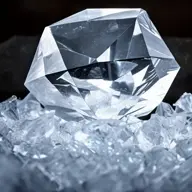

In [24]:
Image.open(BytesIO(b64decode(data['value']['image_data']['value'])))